# Importaciones

Analizar normalidad (los datos si son continuos porque son los volumnes de las variables)

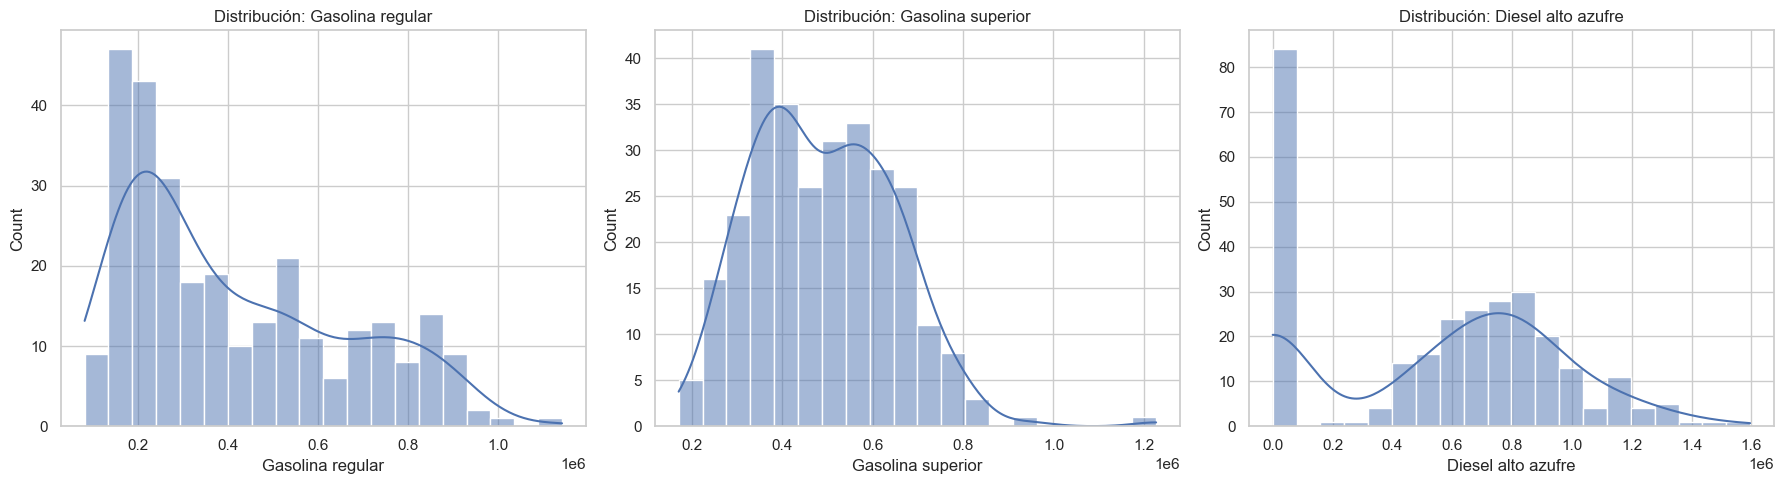

--- Gasolina regular ---
Shapiro-Wilk: p-value = 1.6855e-12
D’Agostino-Pearson: p-value = 9.0213e-08
No sigue una distribución normal.

--- Gasolina superior ---
Shapiro-Wilk: p-value = 3.9059e-05
D’Agostino-Pearson: p-value = 2.5023e-04
No sigue una distribución normal.

--- Diesel alto azufre ---
Shapiro-Wilk: p-value = 5.2387e-13
D’Agostino-Pearson: p-value = 1.2806e-14
No sigue una distribución normal.



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest

df_import = pd.read_excel("Importacion.xlsx")
df_import["Fecha"] = pd.to_datetime(df_import["Fecha"])

import_cols = ["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]

# HISTOGRAMAS CON KDE
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))
for i, col in enumerate(import_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_import[col], kde=True, bins=20)
    plt.title(f"Distribución: {col}")
plt.tight_layout()
plt.show()

# PRUEBAS DE NORMALIDAD
for col in import_cols:
    print(f"--- {col} ---")
    
    # Shapiro-Wilk Test
    stat_shapiro, p_shapiro = shapiro(df_import[col])
    print(f"Shapiro-Wilk: p-value = {p_shapiro:.4e}")
    
    # D’Agostino and Pearson’s test
    stat_dag, p_dag = normaltest(df_import[col])
    print(f"D’Agostino-Pearson: p-value = {p_dag:.4e}")
    
    if p_shapiro < 0.05 or p_dag < 0.05:
        print("No sigue una distribución normal.\n")
    else:
        print("Puede considerarse normal.\n")


Agrupamos los mes sin importar año para ver qué meses han tenido mayores volumenes importados

Promedio mensual de importaciones (en barriles):

     Gasolina regular  Gasolina superior  Diesel alto azufre
Mes                                                         
1           424503.40          507509.57           608368.43
2           400987.12          486170.39           523572.53
3           434328.18          533668.00           632727.75
4           416968.30          495285.53           583115.94
5           412757.63          478710.37           585919.28
6           390716.78          466322.31           493225.65
7           402959.61          480137.81           562228.86
8           393761.17          459568.11           491020.59
9           407069.97          460956.14           464951.15
10          430511.62          500889.89           521008.00
11          408465.20          489149.04           517420.84
12          432362.94          533085.42           665901.43


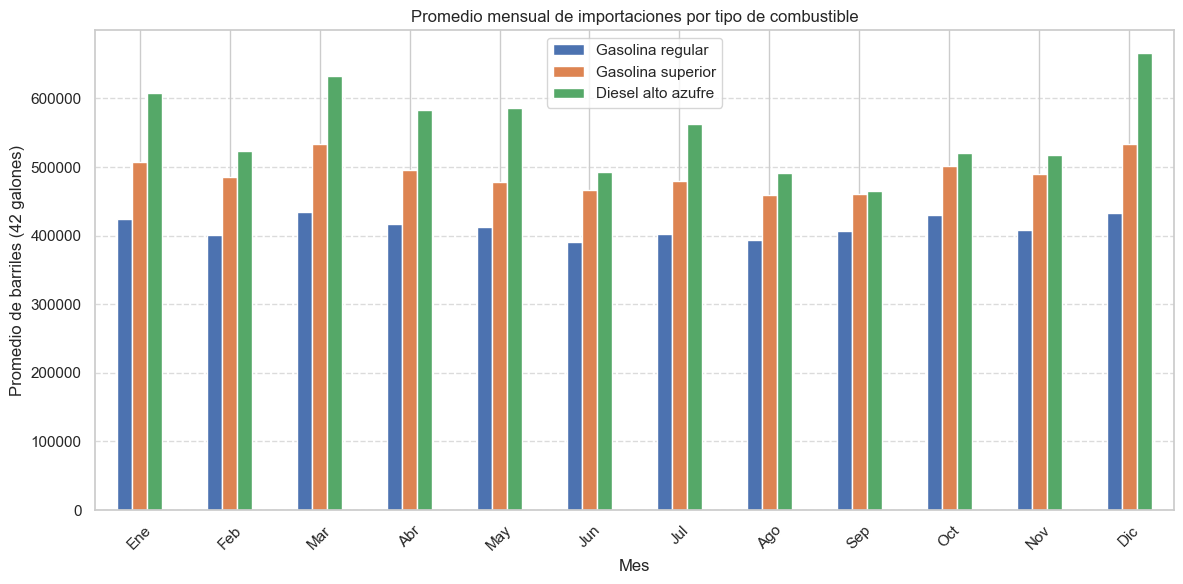

In [17]:
df_import["Mes"] = df_import["Fecha"].dt.month

monthly_avg = df_import.groupby("Mes")[import_cols].mean().round(2)

print("Promedio mensual de importaciones (en barriles):\n")
print(monthly_avg)

monthly_avg.plot(kind="bar", figsize=(12,6))
plt.title("Promedio mensual de importaciones por tipo de combustible")
plt.ylabel("Promedio de barriles (42 galones)")
plt.xlabel("Mes")
plt.xticks(ticks=range(12), labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun",
                                     "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Ahora veamos en que mes tuvo mas importacion cada tipo de combustible

In [ ]:
df_tmp = df_import.copy()

df_tmp["Año"] = df_tmp["Año"].astype(int)

meses = {1:"Ene", 2:"Feb", 3:"Mar", 4:"Abr", 5:"May", 6:"Jun",
         7:"Jul", 8:"Ago", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dic"}

picos_por_anio = pd.DataFrame()
picos_por_anio["Año"] = sorted(df_tmp["Año"].unique())

for col in ["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]:
    maximos = []
    meses_pico = []
    
    for year in picos_por_anio["Año"]:
        datos_ano = df_tmp[df_tmp["Año"] == year][["Fecha", col]].dropna()
        
        if not datos_ano.empty:
            fila_max = datos_ano.loc[datos_ano[col].idxmax()]
            maximos.append(round(fila_max[col], 2))
            meses_pico.append(meses[fila_max["Fecha"].month])
        else:
            maximos.append(None)
            meses_pico.append(None)
    
    picos_por_anio[f"Mes pico {col}"] = meses_pico
    picos_por_anio[f"Máximo {col}"] = maximos

from IPython.display import display
display(picos_por_anio)


,Año,Mes pico Gasolina regular,Máximo Gasolina regular,Mes pico Gasolina superior,Máximo Gasolina superior,Mes pico Diesel alto azufre,Máximo Diesel alto azufre
0,2001,Sep,233643.75,Ene,373963.96,Mar,575559.68
1,2002,Jul,222408.00,Dic,440677.81,Oct,703749.81
2,2003,May,269981.86,May,459025.69,Abr,873103.10
3,2004,Mar,275539.38,Mar,486880.82,Abr,809194.95
4,2005,Nov,266018.37,Ago,566618.55,Dic,1212610.53
5,2006,Sep,366193.77,Ene,711860.77,Oct,1220719.64
6,2007,Ago,351306.27,May,545587.63,Jul,1118432.25
7,2008,Oct,358036.44,Abr,570256.98,Mar,1095743.35
8,2009,Feb,588346.36,Oct,639524.61,Dic,1144960.66
9,2010,Abr,433108.23,Dic,652210.77,Dic,1135293.92


Consideramos interesante ver los años 2020-2021 para ver el impacto de la pandemia, pero solo de super y regular, porque de disel no hay datos

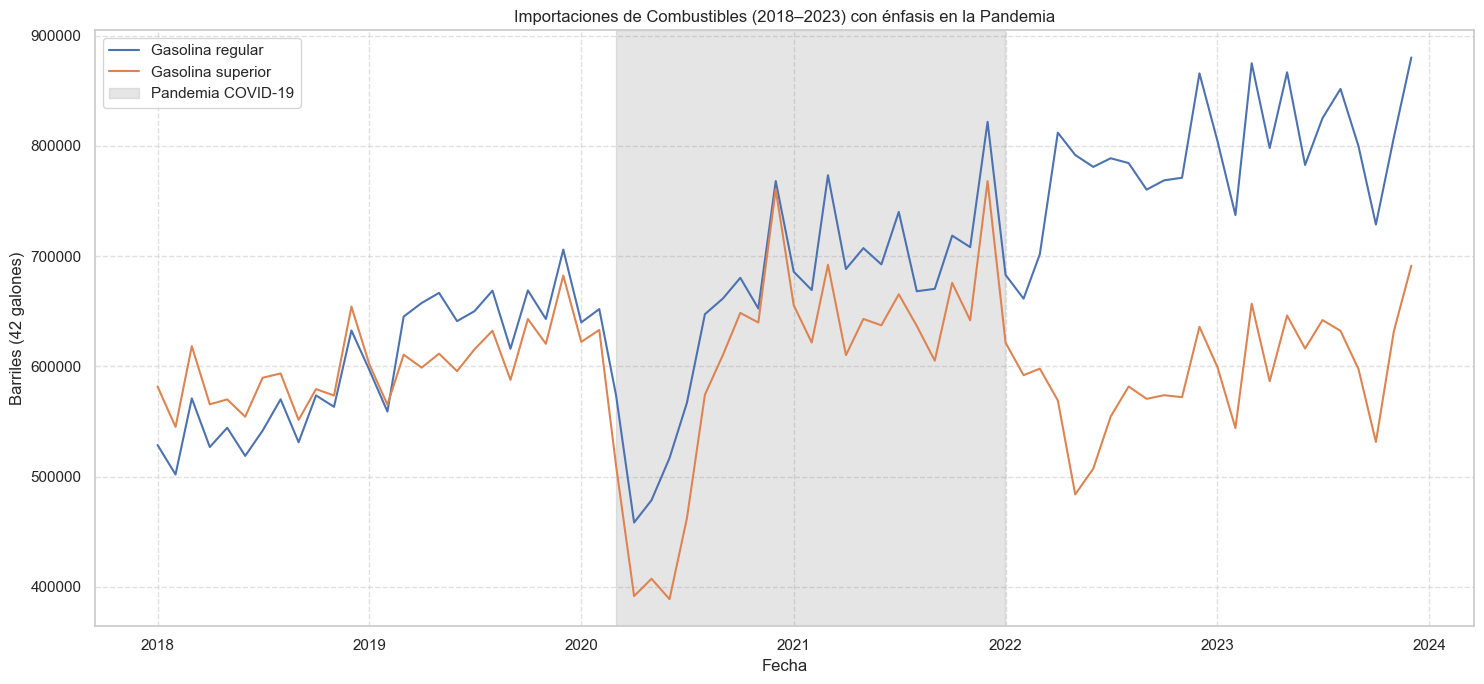

In [28]:
import numpy as np

plt.figure(figsize=(15, 7))

for col in import_cols:
    serie = df_pandemia[col]
    if not np.all((serie.isna()) | (serie == 0)):  # Solo graficar si hay datos válidos
        plt.plot(df_pandemia["Fecha"], serie, label=col)

plt.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2021-12-31"),
            color="gray", alpha=0.2, label="Pandemia COVID-19")

plt.title("Importaciones de Combustibles (2018–2023) con énfasis en la Pandemia")
plt.ylabel("Barriles (42 galones)")
plt.xlabel("Fecha")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# Consumo

Analizar normalidad (los datos si son continuos porque son los volumnes de las variables)

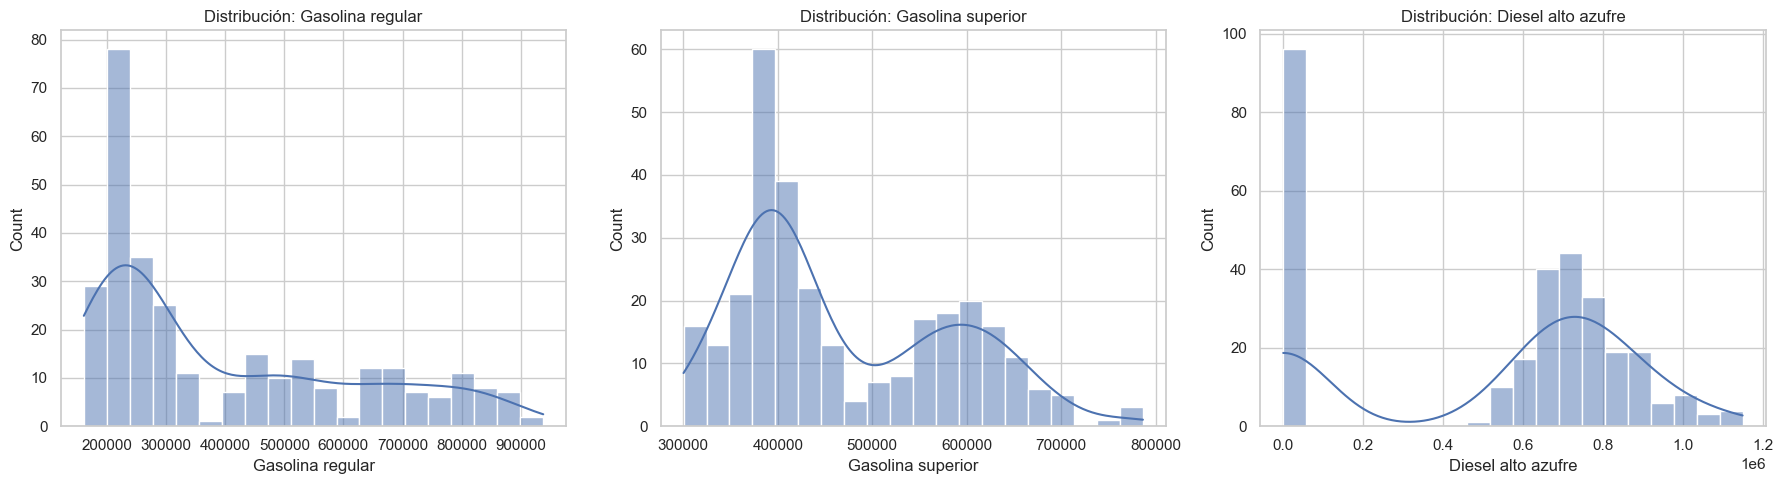

--- Gasolina regular ---
Shapiro-Wilk: p-value = 1.1401e-16
D’Agostino-Pearson: p-value = 1.1780e-09
No sigue una distribución normal.

--- Gasolina superior ---
Shapiro-Wilk: p-value = 3.5068e-12
D’Agostino-Pearson: p-value = 1.0152e-08
No sigue una distribución normal.

--- Diesel alto azufre ---
Shapiro-Wilk: p-value = 9.3722e-19
D’Agostino-Pearson: p-value = 6.1070e-132
No sigue una distribución normal.



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest

df_import = pd.read_excel("Consumo.xlsx")
df_import["Fecha"] = pd.to_datetime(df_import["Fecha"])

import_cols = ["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]

# HISTOGRAMAS CON KDE
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))
for i, col in enumerate(import_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_import[col], kde=True, bins=20)
    plt.title(f"Distribución: {col}")
plt.tight_layout()
plt.show()

# PRUEBAS DE NORMALIDAD
for col in import_cols:
    print(f"--- {col} ---")
    
    # Shapiro-Wilk Test
    stat_shapiro, p_shapiro = shapiro(df_import[col])
    print(f"Shapiro-Wilk: p-value = {p_shapiro:.4e}")
    
    # D’Agostino and Pearson’s test
    stat_dag, p_dag = normaltest(df_import[col])
    print(f"D’Agostino-Pearson: p-value = {p_dag:.4e}")
    
    if p_shapiro < 0.05 or p_dag < 0.05:
        print("No sigue una distribución normal.\n")
    else:
        print("Puede considerarse normal.\n")

Agrupamos los mes sin importar año para ver qué meses han tenido mayores volumenes importados

Promedio mensual de importaciones (en barriles):

     Gasolina regular  Gasolina superior  Diesel alto azufre
Mes                                                         
1           383185.69          465444.13           542594.86
2           369956.87          449589.38           534185.23
3           411988.35          485997.73           595864.64
4           394359.67          454148.85           543003.67
5           393026.63          455444.42           520845.62
6           378066.09          437856.82           467567.32
7           398433.34          471367.12           475682.38
8           402503.81          478979.75           478067.62
9           385355.63          456616.41           447902.43
10          405274.87          481344.61           487125.37
11          394711.53          469803.93           519670.39
12          452884.25          536390.98           560666.00


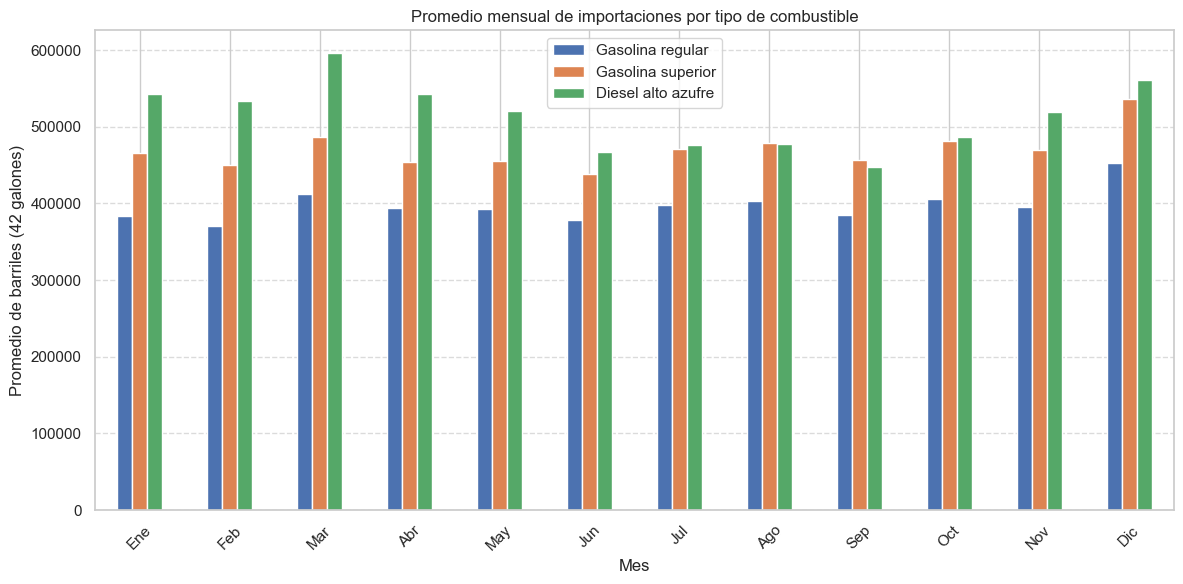

In [30]:
df_import["Mes"] = df_import["Fecha"].dt.month

monthly_avg = df_import.groupby("Mes")[import_cols].mean().round(2)

print("Promedio mensual de importaciones (en barriles):\n")
print(monthly_avg)

monthly_avg.plot(kind="bar", figsize=(12,6))
plt.title("Promedio mensual de importaciones por tipo de combustible")
plt.ylabel("Promedio de barriles (42 galones)")
plt.xlabel("Mes")
plt.xticks(ticks=range(12), labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun",
                                     "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Ahora veamos en que mes tuvo mas importacion cada tipo de combustible

In [32]:
df_tmp = df_import.copy()

df_tmp["Año"] = df_tmp["Fecha"].dt.year

meses = {1:"Ene", 2:"Feb", 3:"Mar", 4:"Abr", 5:"May", 6:"Jun",
         7:"Jul", 8:"Ago", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dic"}

picos_por_anio = pd.DataFrame()
picos_por_anio["Año"] = sorted(df_tmp["Año"].unique())

for col in ["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]:
    maximos = []
    meses_pico = []
    
    for year in picos_por_anio["Año"]:
        datos_ano = df_tmp[df_tmp["Año"] == year][["Fecha", col]].dropna()
        
        if not datos_ano.empty:
            fila_max = datos_ano.loc[datos_ano[col].idxmax()]
            maximos.append(round(fila_max[col], 2))
            meses_pico.append(meses[fila_max["Fecha"].month])
        else:
            maximos.append(None)
            meses_pico.append(None)
    
    picos_por_anio[f"Mes pico {col}"] = meses_pico
    picos_por_anio[f"Máximo {col}"] = maximos

from IPython.display import display
display(picos_por_anio)


,Año,Mes pico Gasolina regular,Máximo Gasolina regular,Mes pico Gasolina superior,Máximo Gasolina superior,Mes pico Diesel alto azufre,Máximo Diesel alto azufre
0,2000,Dic,230020.70,Dic,366987.56,Mar,699807.25
1,2001,Oct,225240.95,Dic,403561.63,Mar,736085.97
2,2002,Mar,212711.71,Dic,400645.42,Ene,726672.60
3,2003,Abr,219004.31,Oct,392041.78,Mar,786484.49
4,2004,Dic,236733.03,Dic,429109.10,Dic,761864.30
5,2005,Dic,241035.13,Dic,448688.52,Abr,803996.93
6,2006,Dic,233936.83,Dic,454373.13,Mar,875047.29
7,2007,Dic,252394.11,Mar,454731.09,Mar,956680.19
8,2008,Dic,298245.47,Dic,463343.73,Abr,807725.77
9,2009,Dic,296805.29,Abr,454265.40,Dic,891670.41


Analisis de la pandemia 

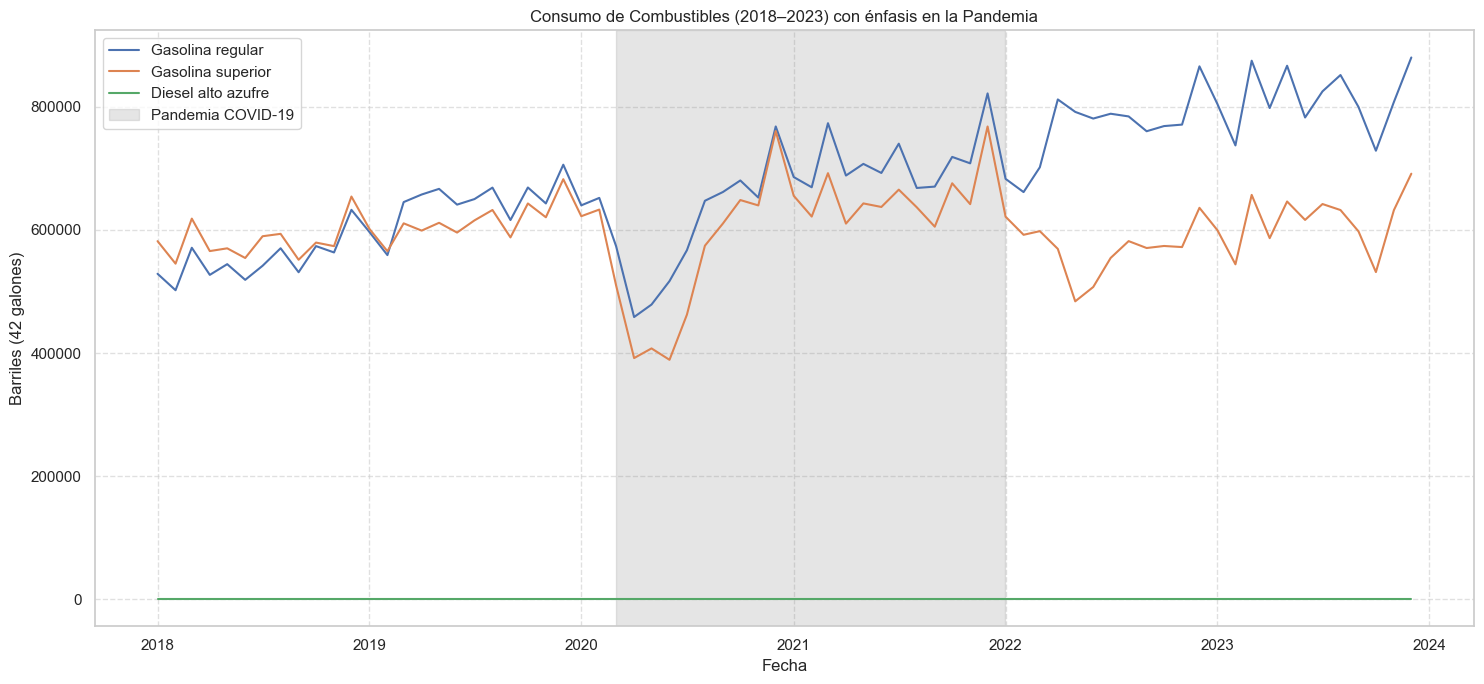

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Cargar y limpiar archivo de consumo ---
df_consumo = pd.read_excel("Consumo.xlsx")
df_consumo.columns = df_consumo.columns.str.strip()
df_consumo["Fecha"] = pd.to_datetime(df_consumo["Fecha"])
df_consumo["Año"] = df_consumo["Fecha"].dt.year
df_consumo["Mes"] = df_consumo["Fecha"].dt.month

# Asegurar columnas numéricas
consumo_cols = ["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]
for col in consumo_cols:
    df_consumo[col] = pd.to_numeric(df_consumo[col], errors="coerce")

# --- Filtrar años de contexto alrededor de la pandemia ---
df_pandemia = df_consumo[(df_consumo["Año"] >= 2018) & (df_consumo["Año"] <= 2023)]

# --- Gráfico ---
plt.figure(figsize=(15, 7))

for col in consumo_cols:
    plt.plot(df_pandemia["Fecha"], df_pandemia[col], label=col)

# Marcar la pandemia
plt.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2021-12-31"),
            color="gray", alpha=0.2, label="Pandemia COVID-19")

# Formato
plt.title("Consumo de Combustibles (2018–2023) con énfasis en la Pandemia")
plt.ylabel("Barriles (42 galones)")
plt.xlabel("Fecha")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
